In [1]:
#!pip install spacy==3.0.6

In [2]:
import pandas as pd
import glob
import json

In [3]:
data_path = '/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data'

### Sentenze Penali Cassazione
http://www.italgiure.giustizia.it/sncass/ 

In [4]:
pdf1 = pd.read_csv(data_path +'/sentenze_penale_pdf.csv')
pdf2 = pd.read_csv(data_path +'/sentenze_penale_pdf2.csv')

In [5]:
pdfs = pd.concat([pdf1,pdf2])

In [6]:
pdfs

,link,text
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: AMICO MASSIM...
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...
...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...


In [7]:
pdfs['text'].nunique()

216

In [8]:
pdfs['chars'] = pdfs['text'].apply(len)
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: AMICO MASSIM...,47626
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


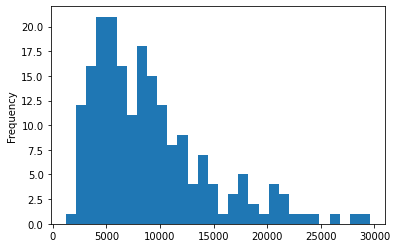

In [15]:
pdfs['chars'].plot.hist(bins=30')

In [10]:
pdfs = pdfs[pdfs['chars']<40000]
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


In [11]:
pdfs[pdfs['chars'] <200]

,link,text,chars
14,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46388 Anno 2021Pre...,124
17,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46138 Anno 2021Pre...,134
37,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46416 Anno 2021Pre...,125
65,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 2 Num. 46876 Anno 2021Pre...,130
83,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46410 Anno 2021Pre...,123
86,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46135 Anno 2021Pre...,116
99,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 45839 Anno 2021Pre...,120
116,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 3 Num. 46817 Anno 2021Pre...,119
135,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 2 Num. 46758 Anno 2021Pre...,127
140,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46156 Anno 2021Pre...,124


In [12]:
#Remove the lines that have a short text that correspond to judgments in the darkening phase
pdfs = pdfs[pdfs['chars'] > 200]

In [13]:
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


In [14]:
pdfs['subtext'] = pdfs['text'].apply(lambda x: x.replace("'"," "))

pdfs['subtext'] = pdfs['subtext'].apply(lambda x: x[x.find(' 1.')+3: x.find(' 1.') + 500])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
pdfs.to_csv(data_path +'/sentenze_penali_clean.csv', index = False)

In [ ]:
df = pd.read_csv(data_path +'/sentenze_penali_clean.csv')
df

### Annotation

Use this web tool https://abera87.github.io/annotate/ from this paper https://arxiv.org/pdf/2108.08184.pdf

First sample

In [ ]:
sample_1 = df.head(26)
sample_1

In [ ]:
txt = " \n ".join(s.lower() for s in sample_1['subtext'])

In [ ]:
ann_file = open("/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data/annotation_sample_1.txt", "w")
 
ann_file.write(txt)
 
ann_file.close()

In [ ]:
s1 = pd.read_json(data_path + '/Output_1.json')
s1

,SentId,SentText,EntityMentions,RelationMentions
0,0,con sentenza del 30 novembre 2021 la corte d ...,"[corte d appello, tonuzi anxhela]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
1,1,la corte di appello di campobasso confermava ...,"[corte di appello, iuliano nadia]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
2,2,"11 tribunale di pavia, con sentenza ex art. 4...","[tribunale, borsan maricel, socio marius]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'borsan..."
3,3,la corte di appello di firenze ha confermato...,"[corte di appello, giuseppe patruno]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,4,"il tribunale di milano, in riforma della sen...","[tribunale, herrera jara luis]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'herrer..."
5,5,"la corte di appello di perugia, in parziale ...","[corte di appello, hudorovich simonetta]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
6,6,"dario giugno, a mezzo del proprio difensore, ...","[dario giugno, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'dario ..."
7,7,il giudice di pace di teramo ha condannato e...,"[giudice, ercole merletti]","[{'Arg1Text': 'giudice', 'Arg2Text': 'ercole m..."
8,8,"con il provvedimento in epigrafe indicato, l...","[corte di appello, sebastiano pelle]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
9,9,con sentenza del 9 novembre 2021 la corte di...,"[corte di appello, vincenzo parrinello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."


In [ ]:
s1 = s1[s1['EntityMentions'] != s1['RelationMentions'] ]
s1.reset_index(drop = True, inplace = True)
s1

,SentId,SentText,EntityMentions,RelationMentions
0,0,con sentenza del 30 novembre 2021 la corte d ...,"[corte d appello, tonuzi anxhela]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
1,1,la corte di appello di campobasso confermava ...,"[corte di appello, iuliano nadia]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
2,2,"11 tribunale di pavia, con sentenza ex art. 4...","[tribunale, borsan maricel, socio marius]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'borsan..."
3,3,la corte di appello di firenze ha confermato...,"[corte di appello, giuseppe patruno]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,4,"il tribunale di milano, in riforma della sen...","[tribunale, herrera jara luis]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'herrer..."
5,5,"la corte di appello di perugia, in parziale ...","[corte di appello, hudorovich simonetta]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
6,6,"dario giugno, a mezzo del proprio difensore, ...","[dario giugno, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'dario ..."
7,7,il giudice di pace di teramo ha condannato e...,"[giudice, ercole merletti]","[{'Arg1Text': 'giudice', 'Arg2Text': 'ercole m..."
8,8,"con il provvedimento in epigrafe indicato, l...","[corte di appello, sebastiano pelle]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
9,9,con sentenza del 9 novembre 2021 la corte di...,"[corte di appello, vincenzo parrinello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."


Second sample

In [ ]:
df = pd.read_csv(data_path +'/sentenze_penali_clean.csv')
sample_2 = df[df.index >26].head(23)
sample_2

In [ ]:
txt = " \n ".join(s.lower() for s in sample_2['subtext'])

In [ ]:
ann_file = open("/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data/annotation_sample_2.txt", "w")
 
ann_file.write(txt)
 
ann_file.close()

In [ ]:
s2 = pd.read_json(data_path + '/Output_2.json')
s2

,SentId,SentText,EntityMentions,RelationMentions
0,0,con ordinanza in data 27 aprile 2021 il tribu...,"[pubblico ministero, maria pia faraoni, nicola...","[{'Arg1Text': 'pubblico ministero', 'Arg2Text'..."
1,1,con ricorso straordinario ex art. 625-bis co...,"[silvio testa, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'silvio..."
2,2,"con sentenza del 17 dicembre 2020, resa ai s...","[tribunale, ivaldo tognazzi]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'ivaldo..."
3,3,con sentenza del 7 ottobre 2020 il tribunale...,"[tribunale, majda ouriniche]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'majda ..."
4,4,la corte di appello di ancona con sentenza d...,"[corte di appello, issam ben jafer]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
5,5,la corte d appello di palermo ha rigettato l...,"[corte d appello, patti calogero]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
6,6,"con ordinanza resa il 10 dicembre 2020, la c...","[corte d appello, saverio palumbo]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
7,7,"la corte d appello di salerno, con ordinanza...","[corte d appello, fabrizio rametta]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
8,8,"la corte d appello di napoli, in data 27 set...","[giudice, raffaele pisaniello, aniello ilario,...","[{'Arg1Text': 'giudice', 'Arg2Text': 'raffaele..."
9,9,a seguito di annullamento con rinvio dispost...,"[corte d appello, luigi ferrara]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."


In [ ]:
s2 = s2[s2['EntityMentions'] != s2['RelationMentions'] ]
s2.reset_index(drop = True, inplace = True)
s2

,SentId,SentText,EntityMentions,RelationMentions
0,0,con ordinanza in data 27 aprile 2021 il tribu...,"[pubblico ministero, maria pia faraoni, nicola...","[{'Arg1Text': 'pubblico ministero', 'Arg2Text'..."
1,1,con ricorso straordinario ex art. 625-bis co...,"[silvio testa, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'silvio..."
2,2,"con sentenza del 17 dicembre 2020, resa ai s...","[tribunale, ivaldo tognazzi]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'ivaldo..."
3,3,con sentenza del 7 ottobre 2020 il tribunale...,"[tribunale, majda ouriniche]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'majda ..."
4,4,la corte di appello di ancona con sentenza d...,"[corte di appello, issam ben jafer]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
5,5,la corte d appello di palermo ha rigettato l...,"[corte d appello, patti calogero]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
6,6,"con ordinanza resa il 10 dicembre 2020, la c...","[corte d appello, saverio palumbo]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
7,7,"la corte d appello di salerno, con ordinanza...","[corte d appello, fabrizio rametta]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
8,8,"la corte d appello di napoli, in data 27 set...","[giudice, raffaele pisaniello, aniello ilario,...","[{'Arg1Text': 'giudice', 'Arg2Text': 'raffaele..."
9,9,a seguito di annullamento con rinvio dispost...,"[corte d appello, luigi ferrara]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."


thrid sample

In [ ]:
df = pd.read_csv(data_path +'/sentenze_penali_clean.csv')
sample_3 = df[df.index >49].head(50)
sample_3

In [ ]:
txt = " \n ".join(s.lower() for s in sample_3['subtext'])

In [ ]:
ann_file = open("/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data/annotation_sample_3.txt", "w")
 
ann_file.write(txt)
 
ann_file.close()

In [ ]:
s3 = pd.read_json(data_path + '/Output_3.json')
s3

,SentId,SentText,EntityMentions,RelationMentions
0,0,"antonio cardone ricorre, a mezzo del proprio ...","[antonio cardone, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'antoni..."
1,1,"con ordinanza del 19 aprile 2021, la corte d...","[corte di appello, tindaro sofia]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
2,2,con la sentenza impugnata la corte d appello...,"[corte d appello, ioan rosus]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
3,3,con la sentenza impugnata la corte d appello...,"[corte d appello, salvatore scuto]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
4,4,"1 con ordinanza in data 11 marzo 2021, il tri...","[tribunale, dumitru danut]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'dumitr..."
5,5,"pucci gianluca, nato a roma il 23/09/1982 2....","[pucci gianluca, di franco debora, corte di ap...","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
6,6,"con sentenza dell 11/11/2019, la corte di ap...","[corte di appello, patrizia bernardi patrizi]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
7,7,con decreto del 12 gennaio 2021 il giudice p...,"[giudice, biolevano s.r.l.]","[{'Arg1Text': 'giudice', 'Arg2Text': 'biolevan..."
8,8,con l impugnata ordinanza il tribunale di rom...,[],[]
9,9,"la corte di appello di milano, con ordinanza...","[difensore, ciappina]","[{'Arg1Text': 'difensore', 'Arg2Text': 'ciappi..."


In [ ]:
s3 = s3[s3['EntityMentions'] != s3['RelationMentions'] ]
s3.reset_index(drop = True, inplace = True)
s3

,SentId,SentText,EntityMentions,RelationMentions
0,0,"antonio cardone ricorre, a mezzo del proprio ...","[antonio cardone, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'antoni..."
1,1,"con ordinanza del 19 aprile 2021, la corte d...","[corte di appello, tindaro sofia]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
2,2,con la sentenza impugnata la corte d appello...,"[corte d appello, ioan rosus]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
3,3,con la sentenza impugnata la corte d appello...,"[corte d appello, salvatore scuto]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
4,4,"1 con ordinanza in data 11 marzo 2021, il tri...","[tribunale, dumitru danut]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'dumitr..."
5,5,"pucci gianluca, nato a roma il 23/09/1982 2....","[pucci gianluca, di franco debora, corte di ap...","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
6,6,"con sentenza dell 11/11/2019, la corte di ap...","[corte di appello, patrizia bernardi patrizi]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
7,7,con decreto del 12 gennaio 2021 il giudice p...,"[giudice, biolevano s.r.l.]","[{'Arg1Text': 'giudice', 'Arg2Text': 'biolevan..."
8,9,"la corte di appello di milano, con ordinanza...","[difensore, ciappina]","[{'Arg1Text': 'difensore', 'Arg2Text': 'ciappi..."
9,10,"1 con sentenza in data 29 gennaio 2020, la co...","[corte di appello, viola gennaro, viola antonio]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."


Fourth Sample

In [ ]:
sample_4 = df[df.index >99]
sample_4

In [ ]:
txt = " \n ".join(s.lower() for s in sample_4['subtext'])

In [ ]:
ann_file = open("/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data/annotation_sample_4.txt", "w")
 
ann_file.write(txt)
 
ann_file.close()

In [ ]:
s4 = pd.read_json(data_path + '/Output_4.json')
s4

,SentId,SentText,EntityMentions,RelationMentions
0,0,con la sentenza impugnata la corte di appello ...,"[corte di appello, davit arjenishvili]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
1,1,la corte di appello di brescia ha disposto l...,"[corte di appello, seffer pascal]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
2,2,"giuseppe battaglia, tramite il difensore di f...","[giuseppe battaglia, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'giusep..."
3,3,"carmine gallo, tramite il difensore di fiduc...","[carmine gallo, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'carmin..."
4,4,"vincenzo allegretti, condannato con sentenza...",[],[]
...,...,...,...,...
95,95,"francesco mastrogiaconno, attraverso il prop...","[francesco mastrogiaconno, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'france..."
96,96,con ordinanza del 29/7/2021 il tribunale di ...,[],[]
97,97,"con l ordinanza indicata in epigrafe, emessa...","[tribunale, castagnini renato]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'castag..."
98,98,con l ordinanza impugnata il tribunale di ca...,[],[]


In [ ]:
s4 = s4[s4['EntityMentions'] != s4['RelationMentions'] ]
s4.reset_index(drop = True, inplace = True)
s4

,SentId,SentText,EntityMentions,RelationMentions
0,0,con la sentenza impugnata la corte di appello ...,"[corte di appello, davit arjenishvili]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
1,1,la corte di appello di brescia ha disposto l...,"[corte di appello, seffer pascal]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
2,2,"giuseppe battaglia, tramite il difensore di f...","[giuseppe battaglia, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'giusep..."
3,3,"carmine gallo, tramite il difensore di fiduc...","[carmine gallo, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'carmin..."
4,5,il procuratore della repubblica presso il tr...,"[tribunale, jorge fernando]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'jorge ..."
...,...,...,...,...
78,93,con la sentenza impugnata la corte di appello...,"[corte di appello, albert mecja]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
79,94,"la corte di appello di ancona, con la senten...","[tribunale, villani greta]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'villan..."
80,95,"francesco mastrogiaconno, attraverso il prop...","[francesco mastrogiaconno, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'france..."
81,97,"con l ordinanza indicata in epigrafe, emessa...","[tribunale, castagnini renato]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'castag..."


In [ ]:
data_annotated = pd.concat([s1,s2,s3,s4])
data_annotated.reset_index(inplace = True,drop= True)
data_annotated

,SentId,SentText,EntityMentions,RelationMentions
0,0,con sentenza del 30 novembre 2021 la corte d ...,"[corte d appello, tonuzi anxhela]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
1,1,la corte di appello di campobasso confermava ...,"[corte di appello, iuliano nadia]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
2,2,"11 tribunale di pavia, con sentenza ex art. 4...","[tribunale, borsan maricel, socio marius]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'borsan..."
3,3,la corte di appello di firenze ha confermato...,"[corte di appello, giuseppe patruno]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,4,"il tribunale di milano, in riforma della sen...","[tribunale, herrera jara luis]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'herrer..."
...,...,...,...,...
166,93,con la sentenza impugnata la corte di appello...,"[corte di appello, albert mecja]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
167,94,"la corte di appello di ancona, con la senten...","[tribunale, villani greta]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'villan..."
168,95,"francesco mastrogiaconno, attraverso il prop...","[francesco mastrogiaconno, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'france..."
169,97,"con l ordinanza indicata in epigrafe, emessa...","[tribunale, castagnini renato]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'castag..."


In [ ]:
data_annotated.drop('SentId',axis = 1, inplace = True)

In [ ]:
def remove_repetition(lista):
    lista_new = []
    for x in lista:
        contenuto = []
        for s in lista:
            if x != s:
                contenuto.append(x in s)
        if not (True in contenuto):
            lista_new.append(x)
    return lista_new

In [ ]:
data_annotated['EntityMentions'] = data_annotated['EntityMentions'].apply(remove_repetition)

In [ ]:
data_annotated

,SentText,EntityMentions,RelationMentions
0,con sentenza del 30 novembre 2021 la corte d ...,"[corte d appello, tonuzi anxhela]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
1,la corte di appello di campobasso confermava ...,"[corte di appello, iuliano nadia]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
2,"11 tribunale di pavia, con sentenza ex art. 4...","[tribunale, borsan maricel, socio marius]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'borsan..."
3,la corte di appello di firenze ha confermato...,"[corte di appello, giuseppe patruno]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,"il tribunale di milano, in riforma della sen...","[tribunale, herrera jara luis]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'herrer..."
...,...,...,...
166,con la sentenza impugnata la corte di appello...,"[corte di appello, albert mecja]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
167,"la corte di appello di ancona, con la senten...","[tribunale, villani greta]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'villan..."
168,"francesco mastrogiaconno, attraverso il prop...","[francesco mastrogiaconno, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'france..."
169,"con l ordinanza indicata in epigrafe, emessa...","[tribunale, castagnini renato]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'castag..."


In [ ]:
import re

def clean_jud(text):
    text = re.sub('art. \d', '',text)
    text = re.sub('artt. \d', '',text)
    text = re.sub("d.p.r \d", '',text)
    text = re.sub("n. \d", '',text)
    text = re.sub("n. dep \d", '',text)
    text = re.sub('ex \d','',text)

    text = text.replace('n.','')
    text = text.replace('cost.','')
    text = text.replace('sent.', '')
    text = text.replace('num.', '')
    text = text.replace('sez.', '')
    text = text.replace('p. e p.', '')
    text = text.replace("d.lgs.", '')
    text = text.replace("cod. pen.", '')
    text = text.replace("cod.proc.pe", '')
    text = text.replace('m.a.e', '')
    text = text.replace('lett.', '')
    

    
    text = re.sub(' +', ' ',text)
    return text


In [ ]:
data_annotated['SentText'] = data_annotated['SentText'].apply(clean_jud)

In [ ]:
data_annotated.iloc[2]['SentText']

' 11 tribunale di pavia, con sentenza 4 , su richiesta concorde delle parti, ha applicato a borsan maricel e socio marius la pena di an e mesi 8 di reclusione ed euro 1.000,00 di multa per numerosi reati di furto pluri-aggravato. 2. borsan marciele e socio marius, a mezzo del difensore, hanno proposto ricorso per cassazione, lamentando: 1) la violazione degli 43, 178 c, in relazione all 4 , in quanto, pur non essendo gli stessi in '

In [ ]:
data_annotated.to_json(data_path +'/manually_annotated_dataset.json')

In [ ]:
data_annotated = pd.read_json(data_path +'/manually_annotated_dataset.json')

In [ ]:
data_annotated.iloc[0]['RelationMentions']

[{'Arg1Text': 'corte d appello',
  'Arg2Text': 'tonuzi anxhela',
  'RelationNames': ['/giudica/giudice/imputato']}]

## Sentenze Giustizia Ammnistrativa
https://www.giustizia-amministrativa.it/web/guest/dcsnprr

In [ ]:
htmls = pd.read_csv(data_path +'/sentenze_html.csv')
htmls

In [ ]:
htmls['text'].nunique()